```
Student-1
Name: Md. Labib
ID# 21-45925-3
```

```
Student-2
Name: Hojaifa Hossain
ID# 20-44218-3
```

```
Student-3
Name: Md. Shadman Tahsin Khan
ID# 21-45796-3
```



*   Mount your google drive.



In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import all necessary libraries.



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [28]:
file_path = '/content/drive/My Drive/Colab Notebooks/datasets/test.csv'

df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [29]:
df = df.drop_duplicates()

num_col = df.select_dtypes(include=['float64', 'int64']).columns
df[num_col] = df[num_col].fillna(df[num_col].mean())

cat_col = df.select_dtypes(include=['object']).columns
for column in cat_col:
    df[column] = df[column].fillna(df[column].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

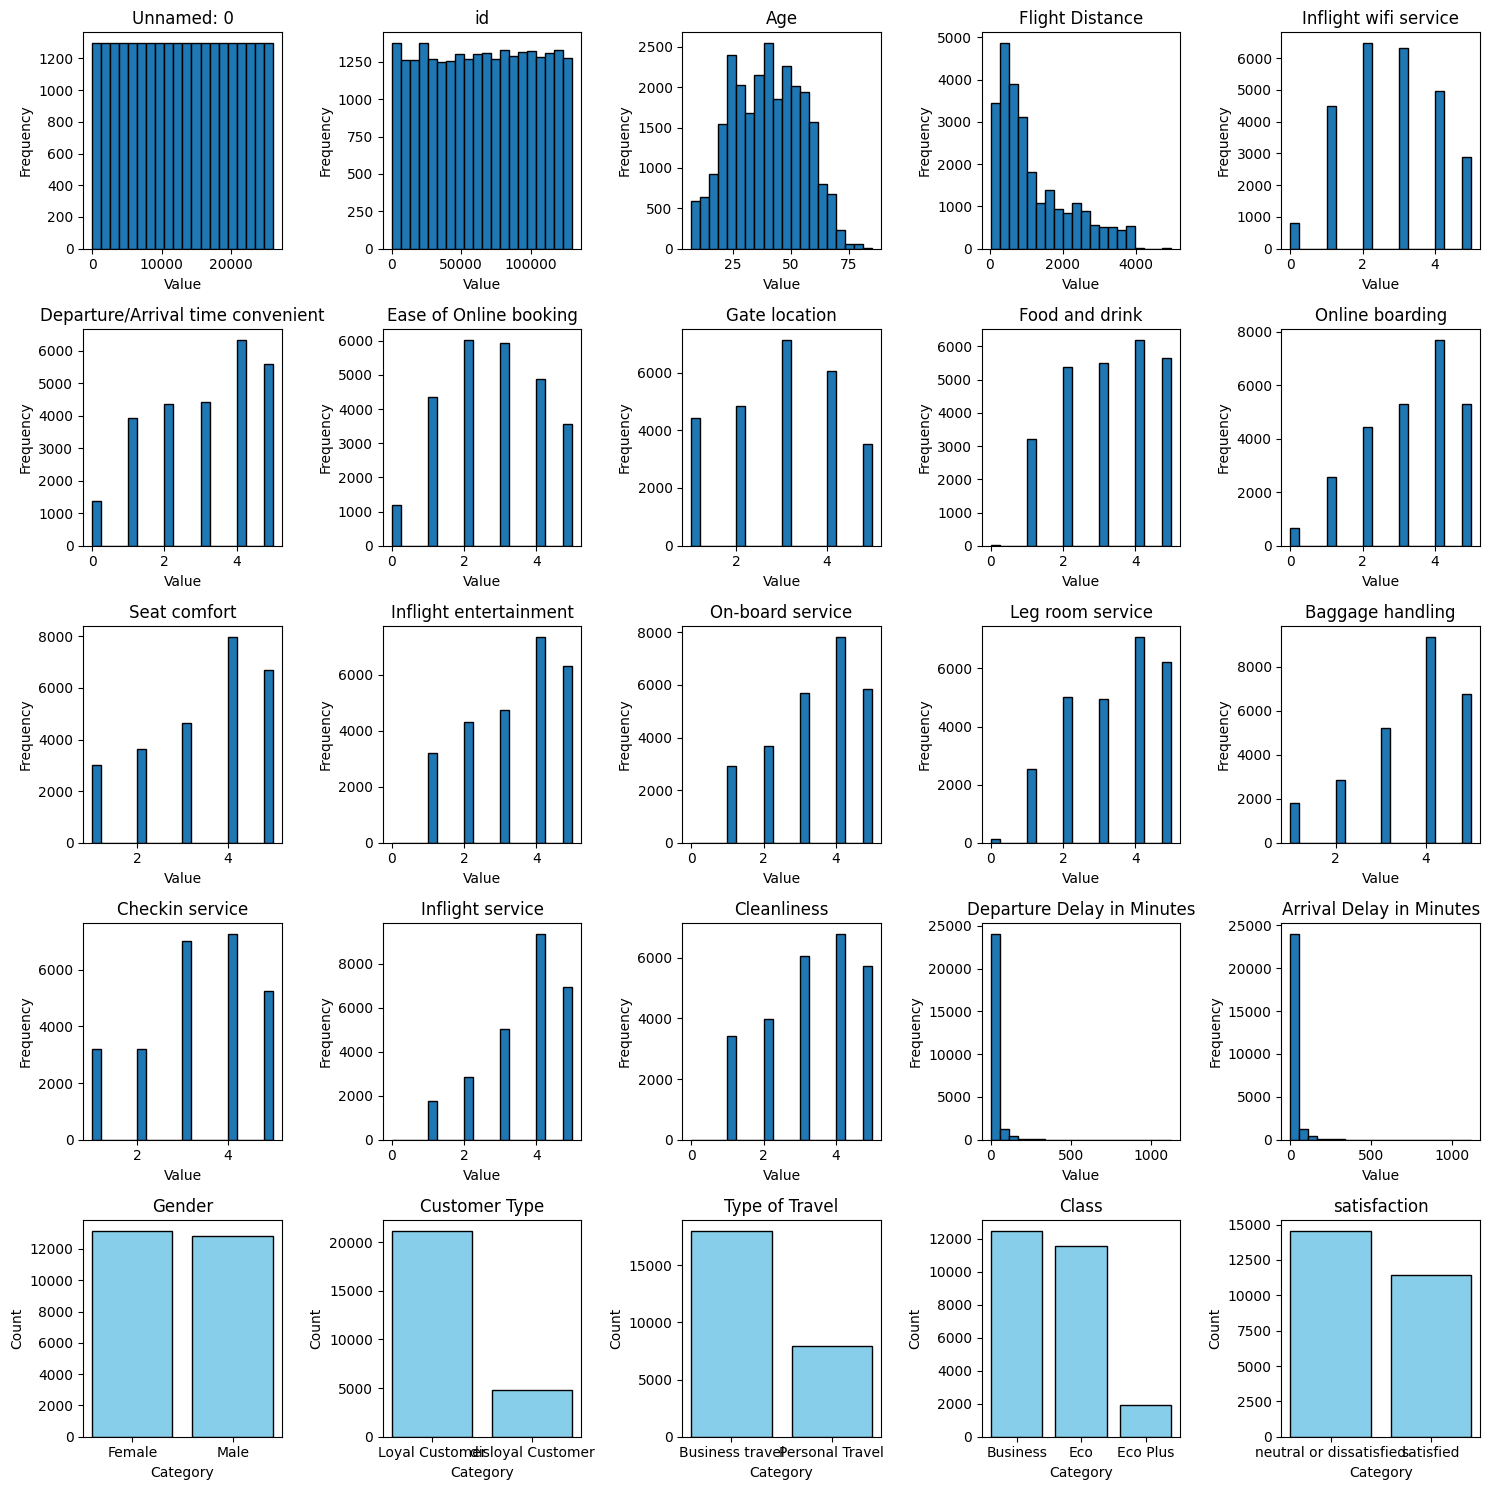

In [30]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object', 'category']).columns

all_columns = list(num_columns) + list(cat_columns)
num_plots = len(all_columns)
rows = (num_plots + 4) // 5

fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(15, 3 * rows))
axes = axes.flatten()

for i, column in enumerate(all_columns):
    ax = axes[i]
    if column in num_columns:
        ax.hist(df[column], bins=20, edgecolor='black')
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    else:
        value_counts = df[column].value_counts()
        ax.bar(value_counts.index.astype(str), value_counts.values, color='skyblue', edgecolor='black')
        ax.set_title(column)
        ax.set_xlabel('Category')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [31]:
target_column = 'satisfaction'

features = df.drop(columns=[target_column])
target = df[target_column]

features = pd.get_dummies(features, drop_first=False)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df[target_column] = target.reset_index(drop=True)

print(scaled_df.head())


   Unnamed: 0        id       Age  Flight Distance  Inflight wifi service  \
0   -1.731984 -1.208420  0.817887        -1.035171               1.703853   
1   -1.731851  0.665483 -0.239238         1.671443              -1.291598   
2   -1.731717 -1.399748 -1.296363        -1.003128              -0.542735   
3   -1.731584  0.344405  0.289325         2.186131              -2.040460   
4   -1.731451 -0.747941  0.619676        -0.011804              -0.542735   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                           0.621641                0.172143       0.797831   
1                          -1.334871                0.172143      -1.542065   
2                          -1.987042               -0.535609       0.797831   
3                          -1.987042               -1.951114      -0.762100   
4                          -0.030530                0.879895       0.017866   

   Food and drink  Online boarding  ...  Gender_Female  Gender

•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [32]:
X = scaled_df.drop(columns=[target_column])
y = scaled_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3241)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 20780
Testing set size: 5196


•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [35]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

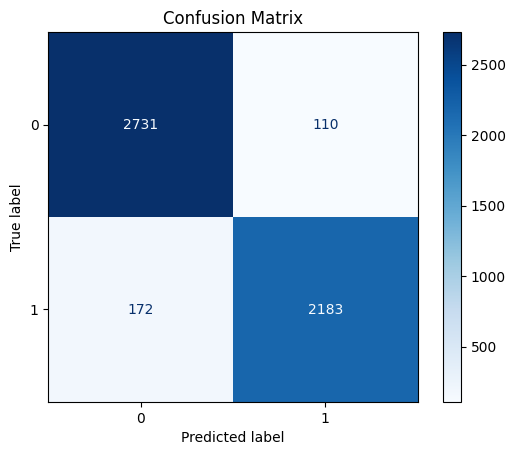

In [ ]:
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [36]:
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 95.51%
Testing Accuracy: 94.57%
